# Relatório 7 - Detecção de Objetos

Tutoriais utilizados

https://docs.opencv.org/4.5.3/db/d28/tutorial_cascade_classifier.html

https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/4-Cascade_classification.ipynb

https://medium.datadriveninvestor.com/haar-cascade-classifiers-237c9193746b

https://github.com/opencv/opencv/tree/master/data/haarcascades

### Este tutorial foi executado como .py por não conseguir o mesmo processo com o Google Colab, o codigo apresentado nesse notebook foi feito para melhor documentação de cada etapa, e o resultado foi anexado ao final

## Primeiro vamos importar as bibliotecas utilizadas nessa atividade

In [ ]:
from __future__ import print_function
import cv2 as cv
import argparse

## Função Para exibir janela e mostrar detecção

In [ ]:
def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)

    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)

        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)

    cv.imshow('Capture - Face detection', frame)

In [ ]:
# Faz o parse da localização dos Cascades e instancia o detector
parser = argparse.ArgumentParser(description='Code for Cascade Classifier tutorial.')
parser.add_argument('--face_cascade', help='Path to face cascade.', default='/home/diego/anaconda3/lib/python3.8/site-packages/cv2/data/haarcascade_frontalface_alt.xml')
parser.add_argument('--eyes_cascade', help='Path to eyes cascade.', default='/home/diego/anaconda3/lib/python3.8/site-packages/cv2/data/haarcascade_eye_tree_eyeglasses.xml')
parser.add_argument('--camera', help='Camera divide number.', type=int, default=0)
args = parser.parse_args()

face_cascade_name = args.face_cascade
eyes_cascade_name = args.eyes_cascade

face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()

# carrega os detectores
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)

camera_device = args.camera


# Lê o innput de video da camera
cap = cv.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)

# Enquanto nenhuma tecla é pressionada a janela que mostra a detecção é mantida ativada
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break

    detectAndDisplay(frame)

    if cv.waitKey(10) == 27:
        break

## Resultado

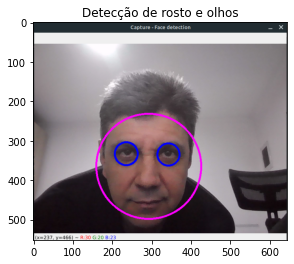

In [4]:
import matplotlib.pyplot as plt
img = cv.imread('pai.png')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Detecção de rosto e olhos')
plt.show()